<a href="https://colab.research.google.com/github/nilnida/DSA210-Term-Project/blob/main/hypothesis_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Hypothesis Testing

In [82]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import f_oneway
from scipy.stats import pearsonr
from scipy.stats import spearmanr

import warnings
warnings.filterwarnings('ignore')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Pearson Correlation Test for Discharge Duration in Relation with Temperature

In [115]:
df_merged_discharge_and_RUL = pd.read_csv("/content/drive/MyDrive/dsa210/df_merged_discharge_and_RUL.csv")

r_cap, p_cap = pearsonr(df_merged_discharge_and_RUL["Battery temperature (°C)"], df_merged_discharge_and_RUL["Time (secs)"])

print("Hypothesis Test: Pearson Correlation")
print("Null Hypothesis: No linear correlation between battery temperature and discharge duration.")
print("Alternative Hypothesis: There is a significant linear correlation.")
print(f"Correlation Coefficient (r): {r_cap}")
print(f"P-Value: {p_cap}")
print(f"Reject Null Hypothesis: {p_cap < 0.05}")

Hypothesis Test: Pearson Correlation
Null Hypothesis: No linear correlation between battery temperature and discharge duration.
Alternative Hypothesis: There is a significant linear correlation.
Correlation Coefficient (r): -0.7586681656065123
P-Value: 1.0388933158394018e-32
Reject Null Hypothesis: True


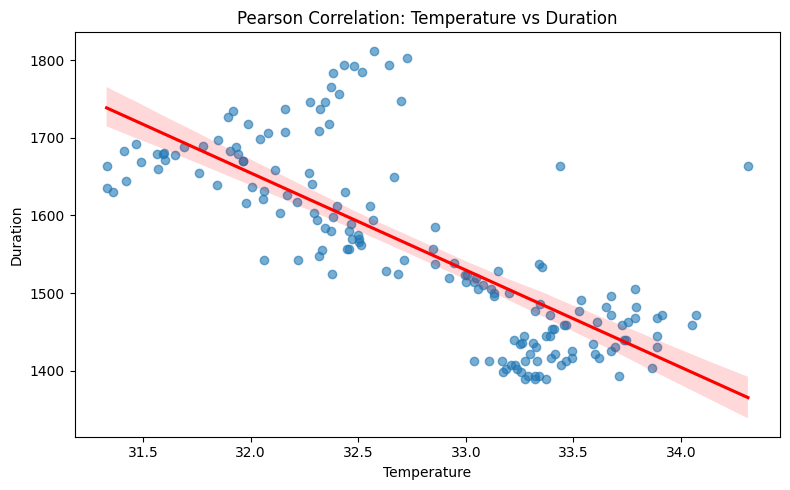

In [111]:
plt.figure(figsize=(8, 5))
sns.regplot(
    x="Battery temperature (°C)",
    y="Time (secs)",
    data=df_merged_discharge_and_RUL,
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.6}
)
plt.title("Pearson Correlation: Temperature vs Duration")
plt.xlabel("Temperature")
plt.ylabel("Duration")
plt.tight_layout()
plt.show()

## Spearman Correlation Test for Discharge Duration in Relation with Temperature

In [116]:
df_merged_discharge_and_RUL = pd.read_csv("/content/drive/MyDrive/dsa210/df_merged_discharge_and_RUL.csv")

rho_cap, p_cap = spearmanr(df_merged_discharge_and_RUL["Battery temperature (°C)"], df_merged_discharge_and_RUL["Time (secs)"])

print("Hypothesis Test: Spearman Rank Correlation")
print("Null Hypothesis: No monotonic relationship between battery temperature and discharge duration.")
print("Alternative Hypothesis: There is a significant monotonic correlation.")
print(f"Correlation Coefficient (ρ): {rho_cap}")
print(f"P-Value: {p_cap}")
print(f"Reject Null Hypothesis: {p_cap < 0.05}")

Hypothesis Test: Spearman Rank Correlation
Null Hypothesis: No monotonic relationship between battery temperature and discharge duration.
Alternative Hypothesis: There is a significant monotonic correlation.
Correlation Coefficient (ρ): -0.765188979606299
P-Value: 1.4419679611288852e-33
Reject Null Hypothesis: True


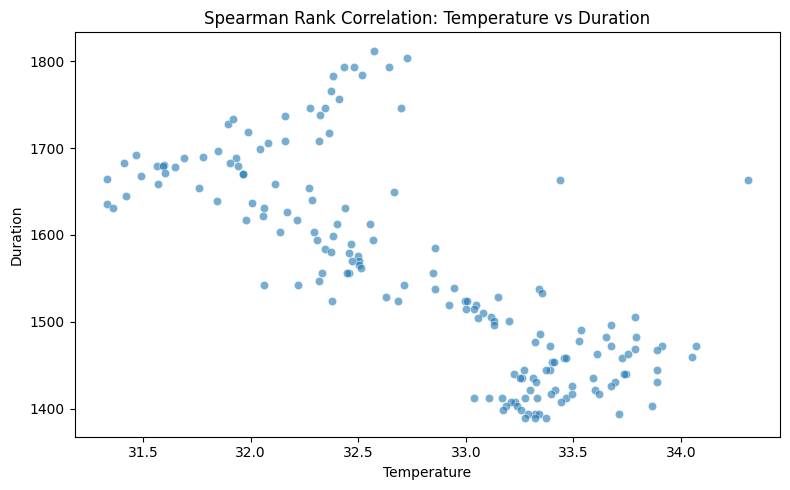

In [117]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="Battery temperature (°C)",
    y="Time (secs)",
    data=df_merged_discharge_and_RUL,
    alpha=0.6
)
plt.title("Spearman Rank Correlation: Temperature vs Duration")
plt.xlabel("Temperature")
plt.ylabel("Duration")
plt.tight_layout()
plt.show()

## Two-Tailed T-Test for Discharge Duration in Relation with Temperature

In [118]:
df_merged_discharge_and_RUL = pd.read_csv("/content/drive/MyDrive/dsa210/df_merged_discharge_and_RUL.csv")

median_temp = df_merged_discharge_and_RUL["Battery temperature (°C)"].median()
low_temp_group = df_merged_discharge_and_RUL[df_merged_discharge_and_RUL["Battery temperature (°C)"] <= median_temp]["Time (secs)"].dropna()
high_temp_group = df_merged_discharge_and_RUL[df_merged_discharge_and_RUL["Battery temperature (°C)"] > median_temp]["Time (secs)"].dropna()

# Perform a two-tailed t-test
t_stat, p_val = ttest_ind(low_temp_group, high_temp_group, equal_var=False)

print("Hypothesis Test: Two-Tailed T-Test")
print("Null Hypothesis: The mean discharge duration is the same in both groups.")
print("Alternative Hypothesis: The mean discharge duration is different between the groups.")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")
print(f"Reject Null Hypothesis: {p_val < 0.05}")

Hypothesis Test: Two-Tailed T-Test
Null Hypothesis: The mean discharge duration is the same in both groups.
Alternative Hypothesis: The mean discharge duration is different between the groups.
T-Statistic: 19.345736701918707
P-Value: 1.1254142603243133e-42
Reject Null Hypothesis: True


## One-Tailed T-Test for Discharge Duration in Relation with Temperature

In [119]:
t_stat, p_val_two_tailed = ttest_ind(low_temp_group, high_temp_group, equal_var=False)

if t_stat > 0:
    p_val_one_tailed = p_val_two_tailed / 2
else:
    p_val_one_tailed = 1 - (p_val_two_tailed / 2)

print("Hypothesis Test: One-Tailed T-Test")
print("Null Hypothesis: The mean discharge duration in the low temperature group is less than or equal to the high temperature group.")
print("Alternative Hypothesis: The mean discharge duration is greater in the low temperature group.")
print(f"T-Statistic: {t_stat}")
print(f"One-Tailed P-Value: {p_val_one_tailed}")
print(f"Reject Null Hypothesis: {p_val_one_tailed < 0.05}")

Hypothesis Test: One-Tailed T-Test
Null Hypothesis: The mean discharge duration in the low temperature group is less than or equal to the high temperature group.
Alternative Hypothesis: The mean discharge duration is greater in the low temperature group.
T-Statistic: 19.345736701918707
One-Tailed P-Value: 5.627071301621567e-43
Reject Null Hypothesis: True


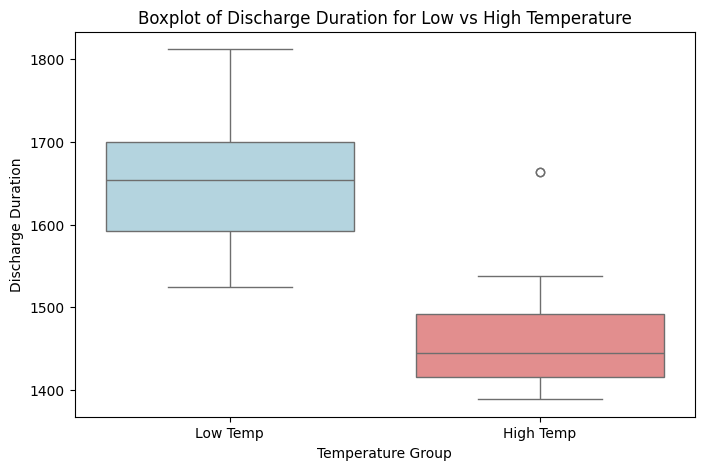

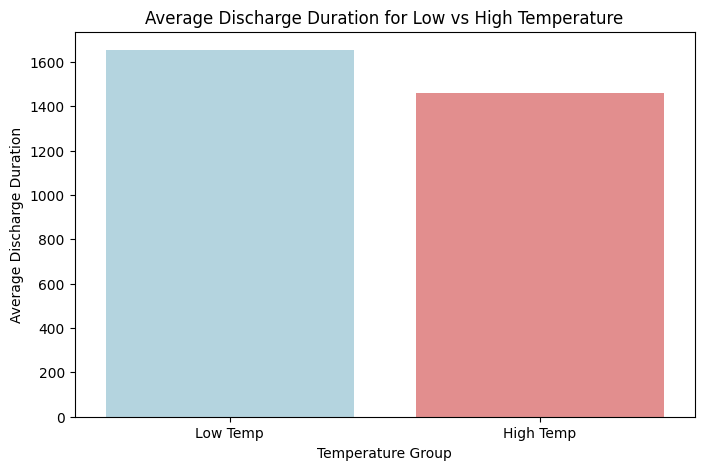

In [120]:
df_merged_discharge_and_RUL["Temp group"] = df_merged_discharge_and_RUL["Battery temperature (°C)"].apply(lambda x: "Low Temp" if x <= median_temp else "High Temp")

temp_colors = {"Low Temp": "lightblue", "High Temp": "lightcoral"}

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_merged_discharge_and_RUL,
    x='Temp group',
    y='Time (secs)',
    palette=[temp_colors["Low Temp"], temp_colors["High Temp"]]
)
plt.title('Boxplot of Discharge Duration for Low vs High Temperature')
plt.xlabel('Temperature Group')
plt.ylabel('Discharge Duration')
plt.show()

# Barplot
average_capacity = df_merged_discharge_and_RUL.groupby('Temp group')["Time (secs)"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=["Low Temp", "High Temp"],
    y=[average_capacity["Low Temp"], average_capacity["High Temp"]],
    palette=[temp_colors["Low Temp"], temp_colors["High Temp"]]
)
plt.title('Average Discharge Duration for Low vs High Temperature')
plt.xlabel('Temperature Group')
plt.ylabel('Average Discharge Duration')
plt.show()

## One-Way ANOVA for Discharge Duration in Relation with Temperature

In [121]:
df_merged_discharge_and_RUL = pd.read_csv("/content/drive/MyDrive/dsa210/df_merged_discharge_and_RUL.csv")

df_merged_discharge_and_RUL['Temp bin'] = pd.cut(df_merged_discharge_and_RUL["Battery temperature (°C)"], bins=3, labels=["Low", "Medium", "High"])
groups = [group['Time (secs)'].dropna() for _, group in df_merged_discharge_and_RUL.groupby('Temp bin')]

# Perform a one-way ANOVA
f_stat, p_anova = f_oneway(*groups)
means = df_merged_discharge_and_RUL.groupby('Temp bin')['Time (secs)'].mean()

print("Hypothesis Test: ANOVA (One-Way)")
print("Null Hypothesis: Mean discharge duration is equal across all temperature bins.")
print("Alternative Hypothesis: At least one group differs.")
print(f"Group Means: {means.to_dict()}")
print(f"F-Statistic = {f_stat}")
print(f"P-Value = {p_anova}")
print(f"Reject H0: {p_anova < 0.05}")

Hypothesis Test: ANOVA (One-Way)
Null Hypothesis: Mean discharge duration is equal across all temperature bins.
Alternative Hypothesis: At least one group differs.
Group Means: {'Low': 1662.0499219831909, 'Medium': 1554.9495304817485, 'High': 1456.1953367128765}
F-Statistic = 68.22562456047194
P-Value = 2.552793322562453e-22
Reject H0: True


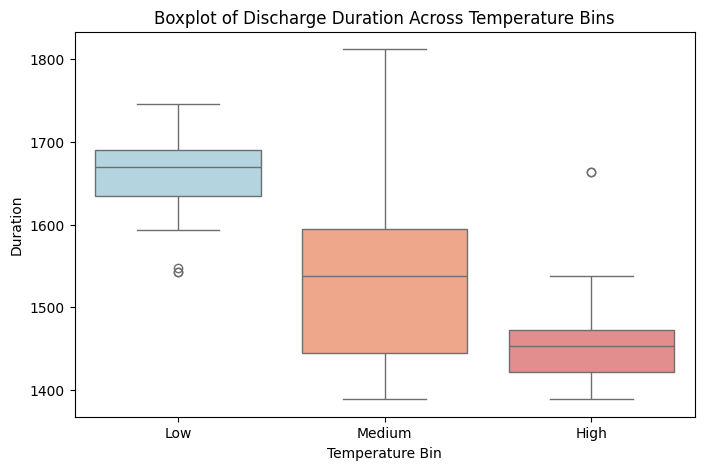

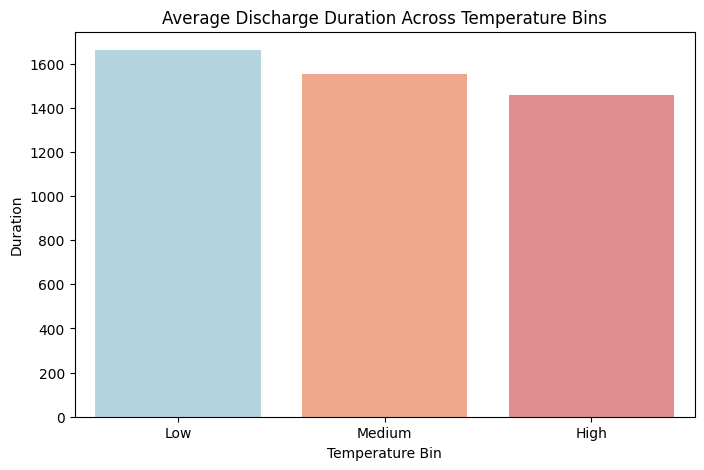

In [122]:
temp_bin_colors = {"Low": "lightblue", "Medium": "lightsalmon", "High": "lightcoral"}

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_merged_discharge_and_RUL,
    x='Temp bin',
    y='Time (secs)',
    order=["Low", "Medium", "High"],
    palette=[temp_bin_colors[label] for label in ["Low", "Medium", "High"]]
)
plt.title('Boxplot of Discharge Duration Across Temperature Bins')
plt.xlabel('Temperature Bin')
plt.ylabel('Duration')
plt.show()

# Barplot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=["Low", "Medium", "High"],
    y=[means["Low"], means["Medium"], means["High"]],
    palette=[temp_bin_colors["Low"], temp_bin_colors["Medium"], temp_bin_colors["High"]]
)
plt.title('Average Discharge Duration Across Temperature Bins')
plt.xlabel('Temperature Bin')
plt.ylabel('Duration')
plt.show()

## Pearson Correlation Test for Capacity in Relation with Temperature

In [83]:
df_merged_discharge_and_RUL = pd.read_csv("/content/drive/MyDrive/dsa210/df_merged_discharge_and_RUL.csv")

r_cap, p_cap = pearsonr(df_merged_discharge_and_RUL["Battery temperature (°C)"], df_merged_discharge_and_RUL["Battery capacity (Ahr) for discharge till 2.7V"])

print("Hypothesis Test: Pearson Correlation")
print("Null Hypothesis: No linear correlation between battery temperature and battery capacity.")
print("Alternative Hypothesis: There is a significant linear correlation.")
print(f"Correlation Coefficient (r): {r_cap}")
print(f"P-Value: {p_cap}")
print(f"Reject H0: {p_cap < 0.05}")

Hypothesis Test: Pearson Correlation
Null Hypothesis: No linear correlation between battery temperature and battery capacity.
Alternative Hypothesis: There is a significant linear correlation.
Correlation Coefficient (r): -0.8097441885175425
P-Value: 2.8106843882059685e-40
Reject H0: True


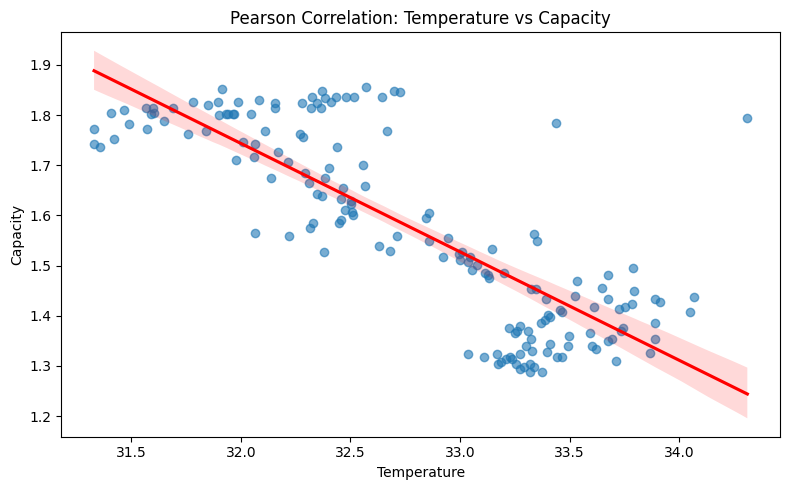

In [84]:
plt.figure(figsize=(8, 5))
sns.regplot(
    x="Battery temperature (°C)",
    y="Battery capacity (Ahr) for discharge till 2.7V",
    data=df_merged_discharge_and_RUL,
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.6}
)
plt.title("Pearson Correlation: Temperature vs Capacity")
plt.xlabel("Temperature")
plt.ylabel("Capacity")
plt.tight_layout()
plt.show()

## Spearman Correlation Test for Capacity in Relation with Temperature

In [85]:
df_merged_discharge_and_RUL = pd.read_csv("/content/drive/MyDrive/dsa210/df_merged_discharge_and_RUL.csv")

rho_cap, p_cap = spearmanr(df_merged_discharge_and_RUL["Battery temperature (°C)"], df_merged_discharge_and_RUL["Battery capacity (Ahr) for discharge till 2.7V"])

print("Hypothesis Test: Spearman Rank Correlation")
print("Null Hypothesis: No monotonic relationship between battery temperature and battery capacity.")
print("Alternative Hypothesis: There is a significant monotonic correlation.")
print(f"Correlation Coefficient (ρ): {rho_cap}")
print(f"P-Value: {p_cap}")
print(f"Reject H0: {p_cap < 0.05}")

Hypothesis Test: Spearman Rank Correlation
Null Hypothesis: No monotonic relationship between battery temperature and battery capacity.
Alternative Hypothesis: There is a significant monotonic correlation.
Correlation Coefficient (ρ): -0.7657508313887864
P-Value: 1.2127188259834856e-33
Reject H0: True


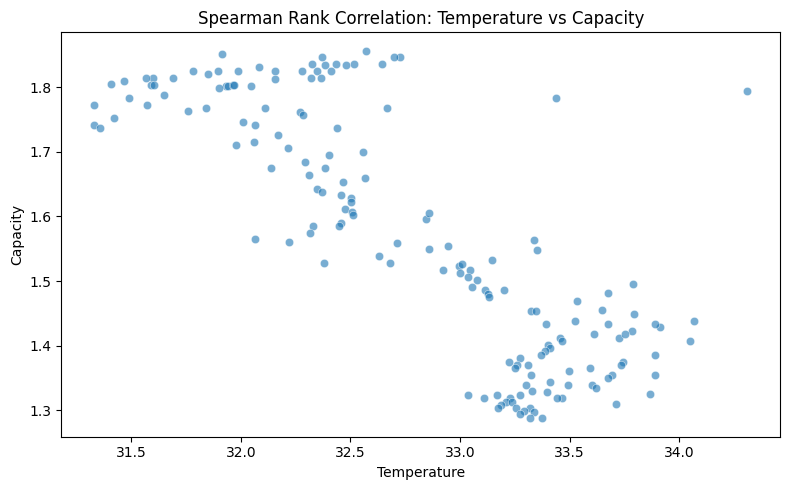

In [86]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="Battery temperature (°C)",
    y="Battery capacity (Ahr) for discharge till 2.7V",
    data=df_merged_discharge_and_RUL,
    alpha=0.6
)
plt.title("Spearman Rank Correlation: Temperature vs Capacity")
plt.xlabel("Temperature")
plt.ylabel("Capacity")
plt.tight_layout()
plt.show()

## Two-Tailed T-Test for Capacity in Relation with Temperature

In [87]:
df_merged_discharge_and_RUL = pd.read_csv("/content/drive/MyDrive/dsa210/df_merged_discharge_and_RUL.csv")

median_temp = df_merged_discharge_and_RUL["Battery temperature (°C)"].median()
low_temp_group = df_merged_discharge_and_RUL[df_merged_discharge_and_RUL["Battery temperature (°C)"] <= median_temp]["Battery capacity (Ahr) for discharge till 2.7V"].dropna()
high_temp_group = df_merged_discharge_and_RUL[df_merged_discharge_and_RUL["Battery temperature (°C)"] > median_temp]["Battery capacity (Ahr) for discharge till 2.7V"].dropna()

# Perform a two-tailed t-test
t_stat, p_val = ttest_ind(low_temp_group, high_temp_group, equal_var=False)

print("Hypothesis Test: Two-Tailed T-Test")
print("Null Hypothesis: The mean battery capacity is the same in both groups.")
print("Alternative Hypothesis: The mean battery capacity is different between the groups.")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")
print(f"Reject Null Hypothesis: {p_val < 0.05}")

Hypothesis Test: Two-Tailed T-Test
Null Hypothesis: The mean battery capacity is the same in both groups.
Alternative Hypothesis: The mean battery capacity is different between the groups.
T-Statistic: 21.839623575172133
P-Value: 1.11288621468798e-50
Reject Null Hypothesis: True


## One-Tailed T-Test for Capacity in Relation with Temperature

In [88]:
t_stat, p_val_two_tailed = ttest_ind(low_temp_group, high_temp_group, equal_var=False)

if t_stat > 0:
    p_val_one_tailed = p_val_two_tailed / 2
else:
    p_val_one_tailed = 1 - (p_val_two_tailed / 2)

print("Hypothesis Test: One-Tailed T-Test")
print("Null Hypothesis: The mean battery capacity in the low temperature group is less than or equal to the high temperature group.")
print("Alternative Hypothesis: The mean battery capacity is greater in the low temperature group.")
print(f"T-Statistic: {t_stat}")
print(f"One-Tailed P-Value: {p_val_one_tailed}")
print(f"Reject Null Hypothesis: {p_val_one_tailed < 0.05}")

Hypothesis Test: One-Tailed T-Test
Null Hypothesis: The mean battery capacity in the low temperature group is less than or equal to the high temperature group.
Alternative Hypothesis: The mean battery capacity is greater in the low temperature group.
T-Statistic: 21.839623575172133
One-Tailed P-Value: 5.5644310734399e-51
Reject Null Hypothesis: True


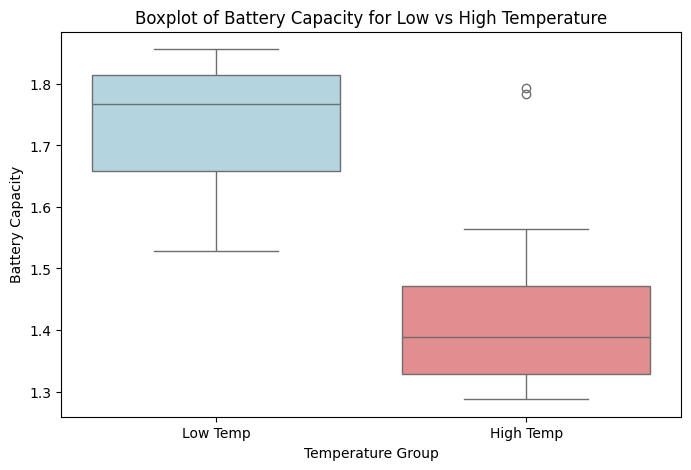

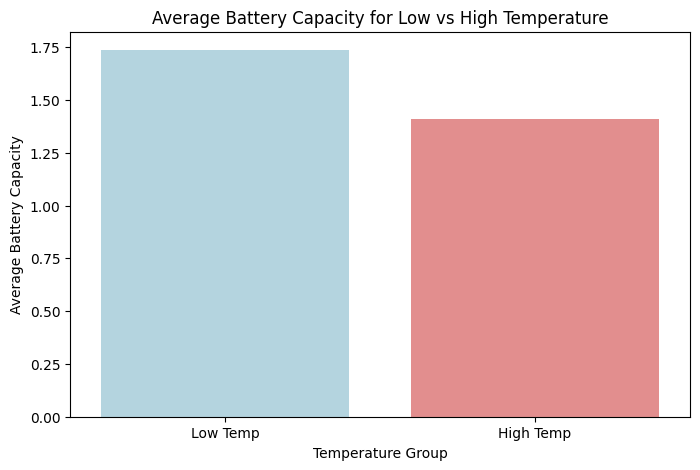

In [89]:
df_merged_discharge_and_RUL["Temp group"] = df_merged_discharge_and_RUL["Battery temperature (°C)"].apply(lambda x: "Low Temp" if x <= median_temp else "High Temp")

temp_colors = {"Low Temp": "lightblue", "High Temp": "lightcoral"}

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_merged_discharge_and_RUL,
    x='Temp group',
    y='Battery capacity (Ahr) for discharge till 2.7V',
    palette=[temp_colors["Low Temp"], temp_colors["High Temp"]]
)
plt.title('Boxplot of Battery Capacity for Low vs High Temperature')
plt.xlabel('Temperature Group')
plt.ylabel('Battery Capacity')
plt.show()

# Barplot
average_capacity = df_merged_discharge_and_RUL.groupby('Temp group')["Battery capacity (Ahr) for discharge till 2.7V"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=["Low Temp", "High Temp"],
    y=[average_capacity["Low Temp"], average_capacity["High Temp"]],
    palette=[temp_colors["Low Temp"], temp_colors["High Temp"]]
)
plt.title('Average Battery Capacity for Low vs High Temperature')
plt.xlabel('Temperature Group')
plt.ylabel('Average Battery Capacity')
plt.show()

## One-Way ANOVA for Capacity in Relation with Temperature

In [90]:
df_merged_discharge_and_RUL = pd.read_csv("/content/drive/MyDrive/dsa210/df_merged_discharge_and_RUL.csv")

df_merged_discharge_and_RUL['Temp bin'] = pd.cut(df_merged_discharge_and_RUL["Battery temperature (°C)"], bins=3, labels=["Low", "Medium", "High"])
groups = [group['Battery capacity (Ahr) for discharge till 2.7V'].dropna() for _, group in df_merged_discharge_and_RUL.groupby('Temp bin')]

# Perform a one-way ANOVA
f_stat, p_anova = f_oneway(*groups)
means = df_merged_discharge_and_RUL.groupby('Temp bin')['Battery capacity (Ahr) for discharge till 2.7V'].mean()

print("Hypothesis Test: ANOVA (One-Way)")
print("Null Hypothesis: Mean battery capacity is equal across all temperature bins.")
print("Alternative Hypothesis: At least one group differs.")
print(f"Group Means: {means.to_dict()}")
print(f"F-Statistic = {f_stat}")
print(f"P-Value = {p_anova}")
print(f"Reject H0: {p_anova < 0.05}")

Hypothesis Test: ANOVA (One-Way)
Null Hypothesis: Mean battery capacity is equal across all temperature bins.
Alternative Hypothesis: At least one group differs.
Group Means: {'Low': 1.7667058821613255, 'Medium': 1.5597373058605843, 'High': 1.4069919676378557}
F-Statistic = 93.62187835584314
P-Value = 6.727485891787589e-28
Reject H0: True


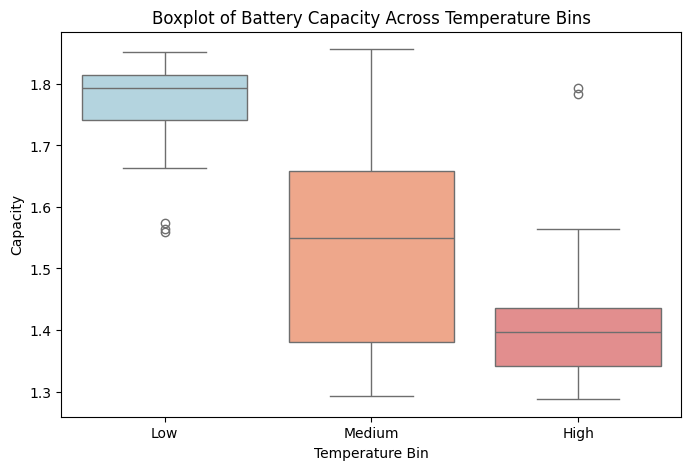

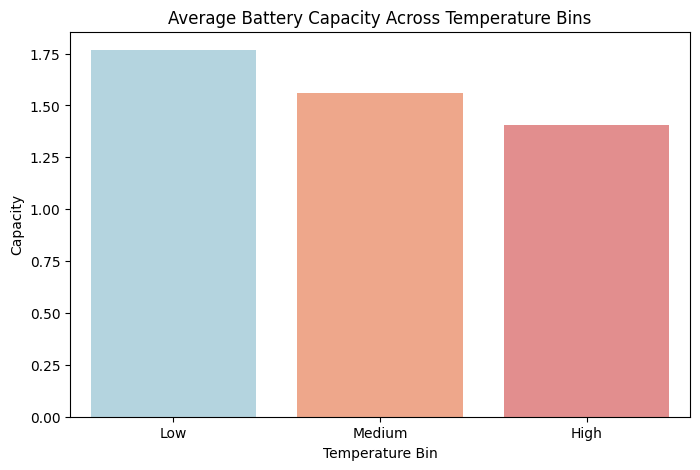

In [91]:
temp_bin_colors = {"Low": "lightblue", "Medium": "lightsalmon", "High": "lightcoral"}

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_merged_discharge_and_RUL,
    x='Temp bin',
    y='Battery capacity (Ahr) for discharge till 2.7V',
    order=["Low", "Medium", "High"],
    palette=[temp_bin_colors[label] for label in ["Low", "Medium", "High"]]
)
plt.title('Boxplot of Battery Capacity Across Temperature Bins')
plt.xlabel('Temperature Bin')
plt.ylabel('Capacity')
plt.show()

# Barplot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=["Low", "Medium", "High"],
    y=[means["Low"], means["Medium"], means["High"]],
    palette=[temp_bin_colors["Low"], temp_bin_colors["Medium"], temp_bin_colors["High"]]
)
plt.title('Average Battery Capacity Across Temperature Bins')
plt.xlabel('Temperature Bin')
plt.ylabel('Capacity')
plt.show()

## Pearson Correlation Test for RUL in Relation with Temperature

In [92]:
df_merged_discharge_and_RUL = pd.read_csv("/content/drive/MyDrive/dsa210/df_merged_discharge_and_RUL.csv")

df_merged_discharge_and_RUL = df_merged_discharge_and_RUL[["Battery temperature (°C)", "RUL"]].dropna()
r_cap, p_cap = pearsonr(df_merged_discharge_and_RUL["Battery temperature (°C)"], df_merged_discharge_and_RUL["RUL"])

print("Hypothesis Test: Pearson Correlation")
print("Null Hypothesis: No linear correlation between battery temperature and remaining useful life (RUL).")
print("Alternative Hypothesis: There is a significant linear correlation.")
print(f"Correlation Coefficient (r): {r_cap}")
print(f"P-Value: {p_cap}")
print(f"Reject H0: {p_cap < 0.05}")

Hypothesis Test: Pearson Correlation
Null Hypothesis: No linear correlation between battery temperature and remaining useful life (RUL).
Alternative Hypothesis: There is a significant linear correlation.
Correlation Coefficient (r): -0.7918862831172826
P-Value: 5.831299114433377e-37
Reject H0: True


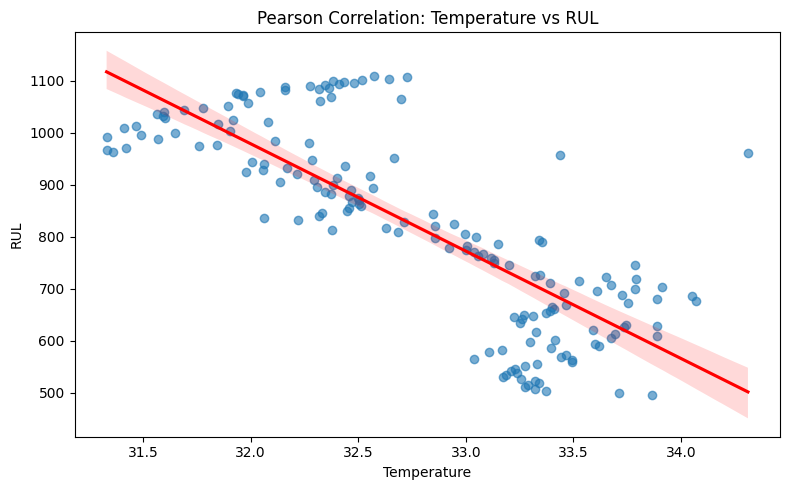

In [93]:
plt.figure(figsize=(8, 5))
sns.regplot(
    x="Battery temperature (°C)",
    y="RUL",
    data=df_merged_discharge_and_RUL,
    line_kws={"color": "red"},
    scatter_kws={"alpha": 0.6}
)
plt.title("Pearson Correlation: Temperature vs RUL")
plt.xlabel("Temperature")
plt.ylabel("RUL")
plt.tight_layout()
plt.show()

## Spearman Correlation Test for RUL in Relation with Temperature

In [104]:
df_merged_discharge_and_RUL = pd.read_csv("/content/drive/MyDrive/dsa210/df_merged_discharge_and_RUL.csv")
df_merged_discharge_and_RUL = df_merged_discharge_and_RUL[["Battery temperature (°C)", "RUL"]].dropna()

rho_cap, p_cap = spearmanr(df_merged_discharge_and_RUL["Battery temperature (°C)"], df_merged_discharge_and_RUL["RUL"])

print("Hypothesis Test: Spearman Rank Correlation")
print("Null Hypothesis: No monotonic relationship between battery temperature and remaining useful life (RUL).")
print("Alternative Hypothesis: There is a significant monotonic correlation.")
print(f"Correlation Coefficient (ρ): {rho_cap}")
print(f"P-Value: {p_cap}")
print(f"Reject H0: {p_cap < 0.05}")

Hypothesis Test: Spearman Rank Correlation
Null Hypothesis: No monotonic relationship between battery temperature and remaining useful life (RUL).
Alternative Hypothesis: There is a significant monotonic correlation.
Correlation Coefficient (ρ): -0.7830223452328641
P-Value: 1.2004211657701526e-35
Reject H0: True


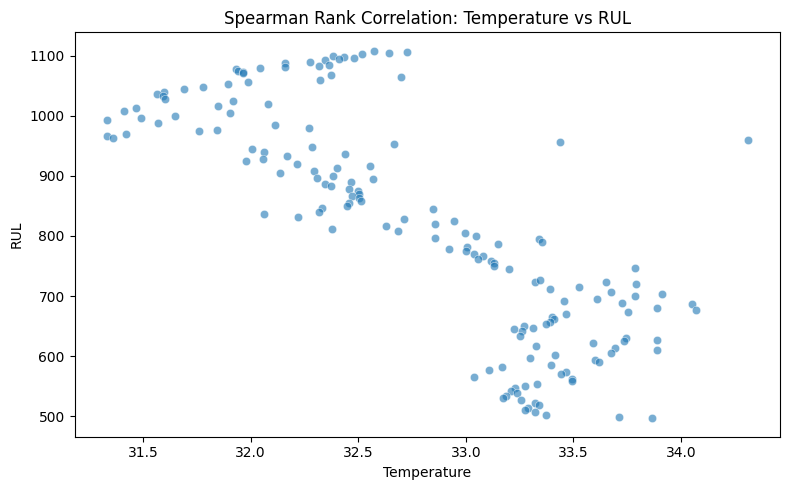

In [105]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    x="Battery temperature (°C)",
    y="RUL",
    data=df_merged_discharge_and_RUL,
    alpha=0.6
)
plt.title("Spearman Rank Correlation: Temperature vs RUL")
plt.xlabel("Temperature")
plt.ylabel("RUL")
plt.tight_layout()
plt.show()

## Two-Tailed T-Test for Capacity in Relation with Remaining useful Life (RUL)

In [96]:
df_merged_discharge_and_RUL = pd.read_csv("/content/drive/MyDrive/dsa210/df_merged_discharge_and_RUL.csv")

median_temp = df_merged_discharge_and_RUL["Battery temperature (°C)"].median()
low_temp_group = df_merged_discharge_and_RUL[df_merged_discharge_and_RUL["Battery temperature (°C)"] <= median_temp]["RUL"].dropna()
high_temp_group = df_merged_discharge_and_RUL[df_merged_discharge_and_RUL["Battery temperature (°C)"] > median_temp]["RUL"].dropna()

# Perform a two-tailed t-test
t_stat, p_val = ttest_ind(low_temp_group, high_temp_group, equal_var=False)

print("Hypothesis Test: Two-Tailed T-Test")
print("Null Hypothesis: The mean remaining useful life (RUL) is the same in both groups.")
print("Alternative Hypothesis: The mean remaining useful life (RUL) is different between the groups.")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_val}")
print(f"Reject Null Hypothesis: {p_val < 0.05}")

Hypothesis Test: Two-Tailed T-Test
Null Hypothesis: The mean remaining useful life (RUL) is the same in both groups.
Alternative Hypothesis: The mean remaining useful life (RUL) is different between the groups.
T-Statistic: 20.57740189874722
P-Value: 5.621172405518512e-47
Reject Null Hypothesis: True


## One-Tailed T-Test for Capacity in Relation with Remaining useful Life (RUL)

In [97]:
t_stat, p_val_two_tailed = ttest_ind(low_temp_group, high_temp_group, equal_var=False)

if t_stat > 0:
    p_val_one_tailed = p_val_two_tailed / 2
else:
    p_val_one_tailed = 1 - (p_val_two_tailed / 2)

print("Hypothesis Test: One-Tailed T-Test")
print("Null Hypothesis: The mean RUL in the low temperature group is less than or equal to the high temperature group.")
print("Alternative Hypothesis: The mean RUL is greater in the low temperature group.")
print(f"T-Statistic: {t_stat}")
print(f"One-Tailed P-Value: {p_val_one_tailed}")
print(f"Reject Null Hypothesis: {p_val_one_tailed < 0.05}")

Hypothesis Test: One-Tailed T-Test
Null Hypothesis: The mean RUL in the low temperature group is less than or equal to the high temperature group.
Alternative Hypothesis: The mean RUL is greater in the low temperature group.
T-Statistic: 20.57740189874722
One-Tailed P-Value: 2.810586202759256e-47
Reject Null Hypothesis: True


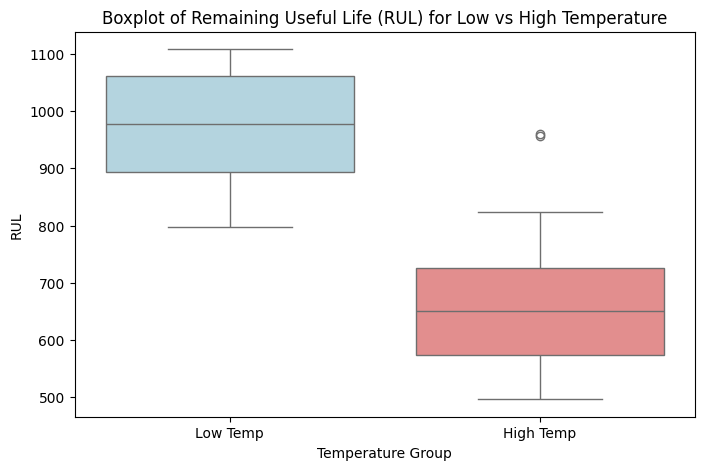

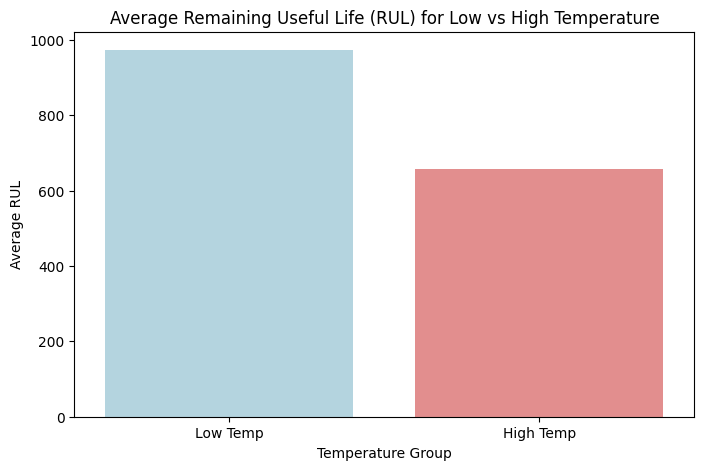

In [98]:
df_merged_discharge_and_RUL["Temp group"] = df_merged_discharge_and_RUL["Battery temperature (°C)"].apply(lambda x: "Low Temp" if x <= median_temp else "High Temp")

temp_colors = {"Low Temp": "lightblue", "High Temp": "lightcoral"}

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_merged_discharge_and_RUL,
    x='Temp group',
    y='RUL',
    palette=[temp_colors["Low Temp"], temp_colors["High Temp"]]
)
plt.title('Boxplot of Remaining Useful Life (RUL) for Low vs High Temperature')
plt.xlabel('Temperature Group')
plt.ylabel('RUL')
plt.show()

# Barplot
average_capacity = df_merged_discharge_and_RUL.groupby('Temp group')["RUL"].mean()

plt.figure(figsize=(8, 5))
sns.barplot(
    x=["Low Temp", "High Temp"],
    y=[average_capacity["Low Temp"], average_capacity["High Temp"]],
    palette=[temp_colors["Low Temp"], temp_colors["High Temp"]]
)
plt.title('Average Remaining Useful Life (RUL) for Low vs High Temperature')
plt.xlabel('Temperature Group')
plt.ylabel('Average RUL')
plt.show()

## One-Way ANOVA for RUL in Relation with Temperature

In [99]:
df_merged_discharge_and_RUL = pd.read_csv("/content/drive/MyDrive/dsa210/df_merged_discharge_and_RUL.csv")

df_merged_discharge_and_RUL['Temp bin'] = pd.cut(df_merged_discharge_and_RUL["Battery temperature (°C)"], bins=3, labels=["Low", "Medium", "High"])
groups = [group['RUL'].dropna() for _, group in df_merged_discharge_and_RUL.groupby('Temp bin')]

# Perform a one-way ANOVA
f_stat, p_anova = f_oneway(*groups)
means = df_merged_discharge_and_RUL.groupby('Temp bin')['RUL'].mean()

print("Hypothesis Test: ANOVA (One-Way)")
print("Null Hypothesis: Mean RUL is equal across all temperature bins.")
print("Alternative Hypothesis: At least one group differs.")
print(f"Group Means: {means.to_dict()}")
print(f"F-Statistic = {f_stat}")
print(f"P-Value = {p_anova}")
print(f"Reject H0: {p_anova < 0.05}")

Hypothesis Test: ANOVA (One-Way)
Null Hypothesis: Mean RUL is equal across all temperature bins.
Alternative Hypothesis: At least one group differs.
Group Means: {'Low': 994.8792925824176, 'Medium': 811.1690024950896, 'High': 652.1591163938102}
F-Statistic = 81.73646437193544
P-Value = 2.598633162882089e-25
Reject H0: True


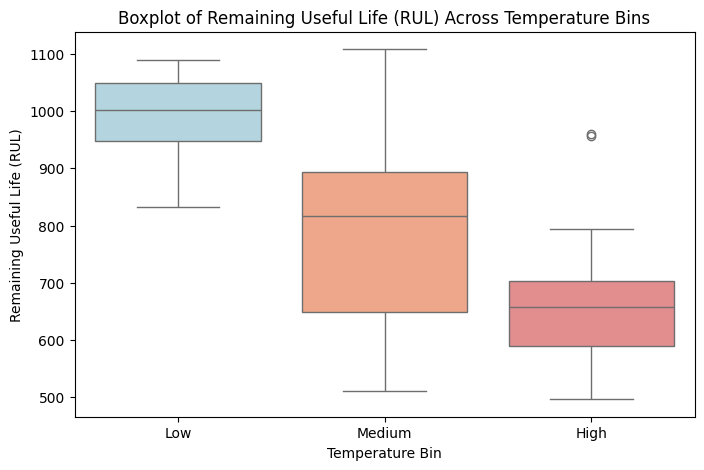

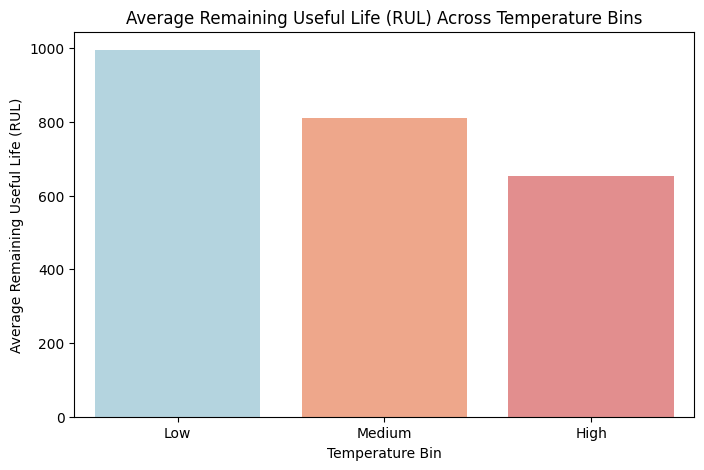

In [100]:
temp_bin_colors = {"Low": "lightblue", "Medium": "lightsalmon", "High": "lightcoral"}

# Boxplot
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df_merged_discharge_and_RUL,
    x='Temp bin',
    y='RUL',
    order=["Low", "Medium", "High"],
    palette=[temp_bin_colors[label] for label in ["Low", "Medium", "High"]]
)
plt.title('Boxplot of Remaining Useful Life (RUL) Across Temperature Bins')
plt.xlabel('Temperature Bin')
plt.ylabel('Remaining Useful Life (RUL)')
plt.show()

# Barplot
plt.figure(figsize=(8, 5))
sns.barplot(
    x=["Low", "Medium", "High"],
    y=[means["Low"], means["Medium"], means["High"]],
    palette=[temp_bin_colors["Low"], temp_bin_colors["Medium"], temp_bin_colors["High"]]
)
plt.title('Average Remaining Useful Life (RUL) Across Temperature Bins')
plt.xlabel('Temperature Bin')
plt.ylabel('Average Remaining Useful Life (RUL)')
plt.show()